# Assignment 7 - Group 8
We have used a dataset that has the production budget of 500 most expensive movies ever made. 
We have used an exponential pdf for the dataset.

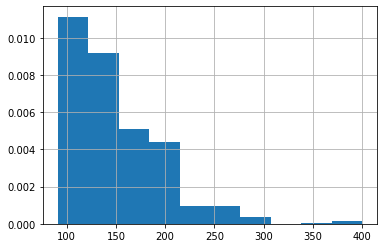

In [30]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
import pymc3 as pm

movies = pd.read_csv("data3/top-500-movies.csv")
production_cost = movies.production_cost/1000000
production_cost.head()

production_cost.hist(normed = True, bins = 10)


# MLE


C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


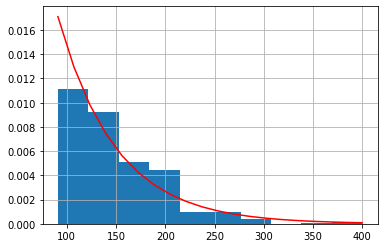

In [26]:
import scipy.stats as st

production_cost = movies.production_cost/1000000 
dist = st.expon
params = dist.fit(production_cost)

min_prod_cost = np.min(production_cost)
max_prod_cost = np.max(production_cost)
production_cost.hist(normed = True, bins = 10)
plt.plot(np.linspace(min_prod_cost, max_prod_cost, 20), expon.pdf(np.linspace(min_prod_cost, max_prod_cost, 20), loc = params[0], scale = params[1]), color = "red")

# Baysian Simulation Using PyMC3



In [27]:
from pymc3 import Model, Uniform, Normal, Exponential
with pm.Model() as exponential_model:
    
    lam = Normal("lam", 100, sd=10)    
    

In [16]:
with exponential_model:
    prod_cost = Exponential('prod_cost', 1./10, testval=5.0, observed = production_cost)

In [17]:
from pymc3 import fit
with exponential_model:
    prod_cost_trace = fit(random_seed = 20090425).sample(1000) 

Finished [100%]: Average Loss = 8,626.8


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


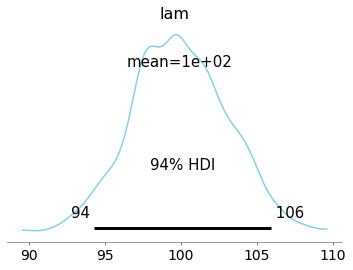

In [19]:
from pymc3 import plot_posterior

plot_posterior(prod_cost_trace[100:], 
                var_names="lam",
                color='#87ceeb');